In [1]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

import gc

# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from scipy.stats import skew
sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0", "figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)
import matplotlib.ticker as ticker

# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for Statistical Analysis
from scipy import stats
from scipy.stats import chi2, chi2_contingency

# Setting Display Options
pd.set_option("display.max.columns", None)

# Machine Learning Algorithms
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib


import tensorflow as tf

# ---> ADD GPU CONFIGURATION HERE <---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    print(f"GPUs available: {len(gpus)}")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout,LeakyReLU
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import SGD
import keras_tuner
import keras


# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,silhouette_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Data Source
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


2026-02-13 21:15:23.066986: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


GPUs available: 1


In [2]:
testing_set = pd.read_csv('archive/UNSW_NB15_testing-set.csv')
training_set = pd.read_csv('archive/UNSW_NB15_training-set.csv')
LIST_EVENTS = pd.read_csv('archive/UNSW-NB15_LIST_EVENTS.csv')
NB15_1 = pd.read_csv('archive/UNSW-NB15_1.csv')
NB15_2 = pd.read_csv('archive/UNSW-NB15_2.csv')
NB15_3 = pd.read_csv('archive/UNSW-NB15_3.csv')
NB15_4 = pd.read_csv('archive/UNSW-NB15_4.csv')
NB15_features = pd.read_csv('archive/NUSW-NB15_features.csv', encoding='cp1252')

In [3]:
NB15_1.columns = NB15_features['Name'] 
NB15_2.columns = NB15_features['Name'] 
NB15_3.columns = NB15_features['Name'] 
NB15_4.columns = NB15_features['Name'] 

In [4]:
train_df = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)

In [5]:
# Shuffle the data points in train_df
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
# Identify the data types of columns
column_data_types = train_df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 40 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [7]:
train_df = train_df.drop_duplicates()

In [8]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Name,,
srcip,0,0.00
sport,0,0.00
dstip,0,0.00
dsport,0,0.00
proto,0,0.00
state,0,0.00
dur,0,0.00
sbytes,0,0.00
dbytes,0,0.00


In [9]:
# NaN values implies that no attack are there for that particular row data, Replace NaN values in the 'attack_cat' column with 'not attacked'
train_df['attack_cat'].fillna('normal',inplace = True)
train_df['attack_cat'] = train_df['attack_cat'].apply(lambda x: x.strip().lower())

# missing values imply that there were no flows with HTTP methods in certain instances so we will replace the NAN with 0 
train_df['ct_flw_http_mthd'].fillna(0, inplace=True)

# is_ftp_login is of type binary that mean it takes 1(user has loged in) or 0 (or not) so the best approch is to replace nan with 0
train_df['is_ftp_login'].fillna(0, inplace=True)

In [10]:
def convert_to_binary(df, column):
    df[column] = (df[column] > 0).astype(int)
    return df

In [11]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('str')

In [12]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].replace(' ', '0')

In [13]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('int')

In [14]:
column = 'is_ftp_login'
convert_to_binary(train_df, column)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,0.0,0,0,10,8,4,5,3,1,7,normal,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,0.0,0,0,14,6,8,12,5,1,6,normal,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0,0,9,16,7,6,1,1,3,normal,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,0.0,0,0,33,33,17,17,17,17,33,generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0,0,2,2,5,4,1,1,1,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,59.166.0.2,29290,149.171.126.9,143,tcp,FIN,0.031870,7820,15060,31,29,30,32,-,1.946909e+06,3.750486e+06,122,126,255,255,1419799572,3566126516,64,120,0,0,17.059750,14.605255,1424235269,1424235269,0.286682,0.250768,0.000662,0.000521,0.000141,0,0,0.0,0,0,5,6,1,4,1,1,1,normal,0
2540037,59.166.0.0,18378,149.171.126.0,17406,udp,CON,0.035147,528,304,31,29,0,0,-,9.013572e+04,5.189632e+04,4,4,0,0,0,0,132,76,0,0,9.409706,10.879310,1421957338,1421957338,6.662667,7.699333,0.000000,0.000000,0.000000,0,0,0.0,0,0,11,4,3,7,1,1,1,normal,0
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0,0,0.0,0,0,3,10,4,1,1,1,1,normal,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,29,0,0,dns,4.966571e+05,6.189111e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424238783,1424238783,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0,0,1,1,2,6,1,1,1,normal,0


In [15]:
#Converting in string first to ensure consistency
train_df['sport'] = train_df['sport'].astype('str')

In [16]:
# Handling non-integer values or NaNs
train_df['sport'] = pd.to_numeric(train_df['sport'], errors='coerce').fillna(0).astype(int)

In [17]:
#Converting in string first to ensure consistency
train_df['dsport'] = train_df['dsport'].astype('str')

In [18]:
# Handling non-integer values or NaNs
train_df['dsport'] = pd.to_numeric(train_df['dsport'], errors='coerce').fillna(0).astype(int)

In [19]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

43

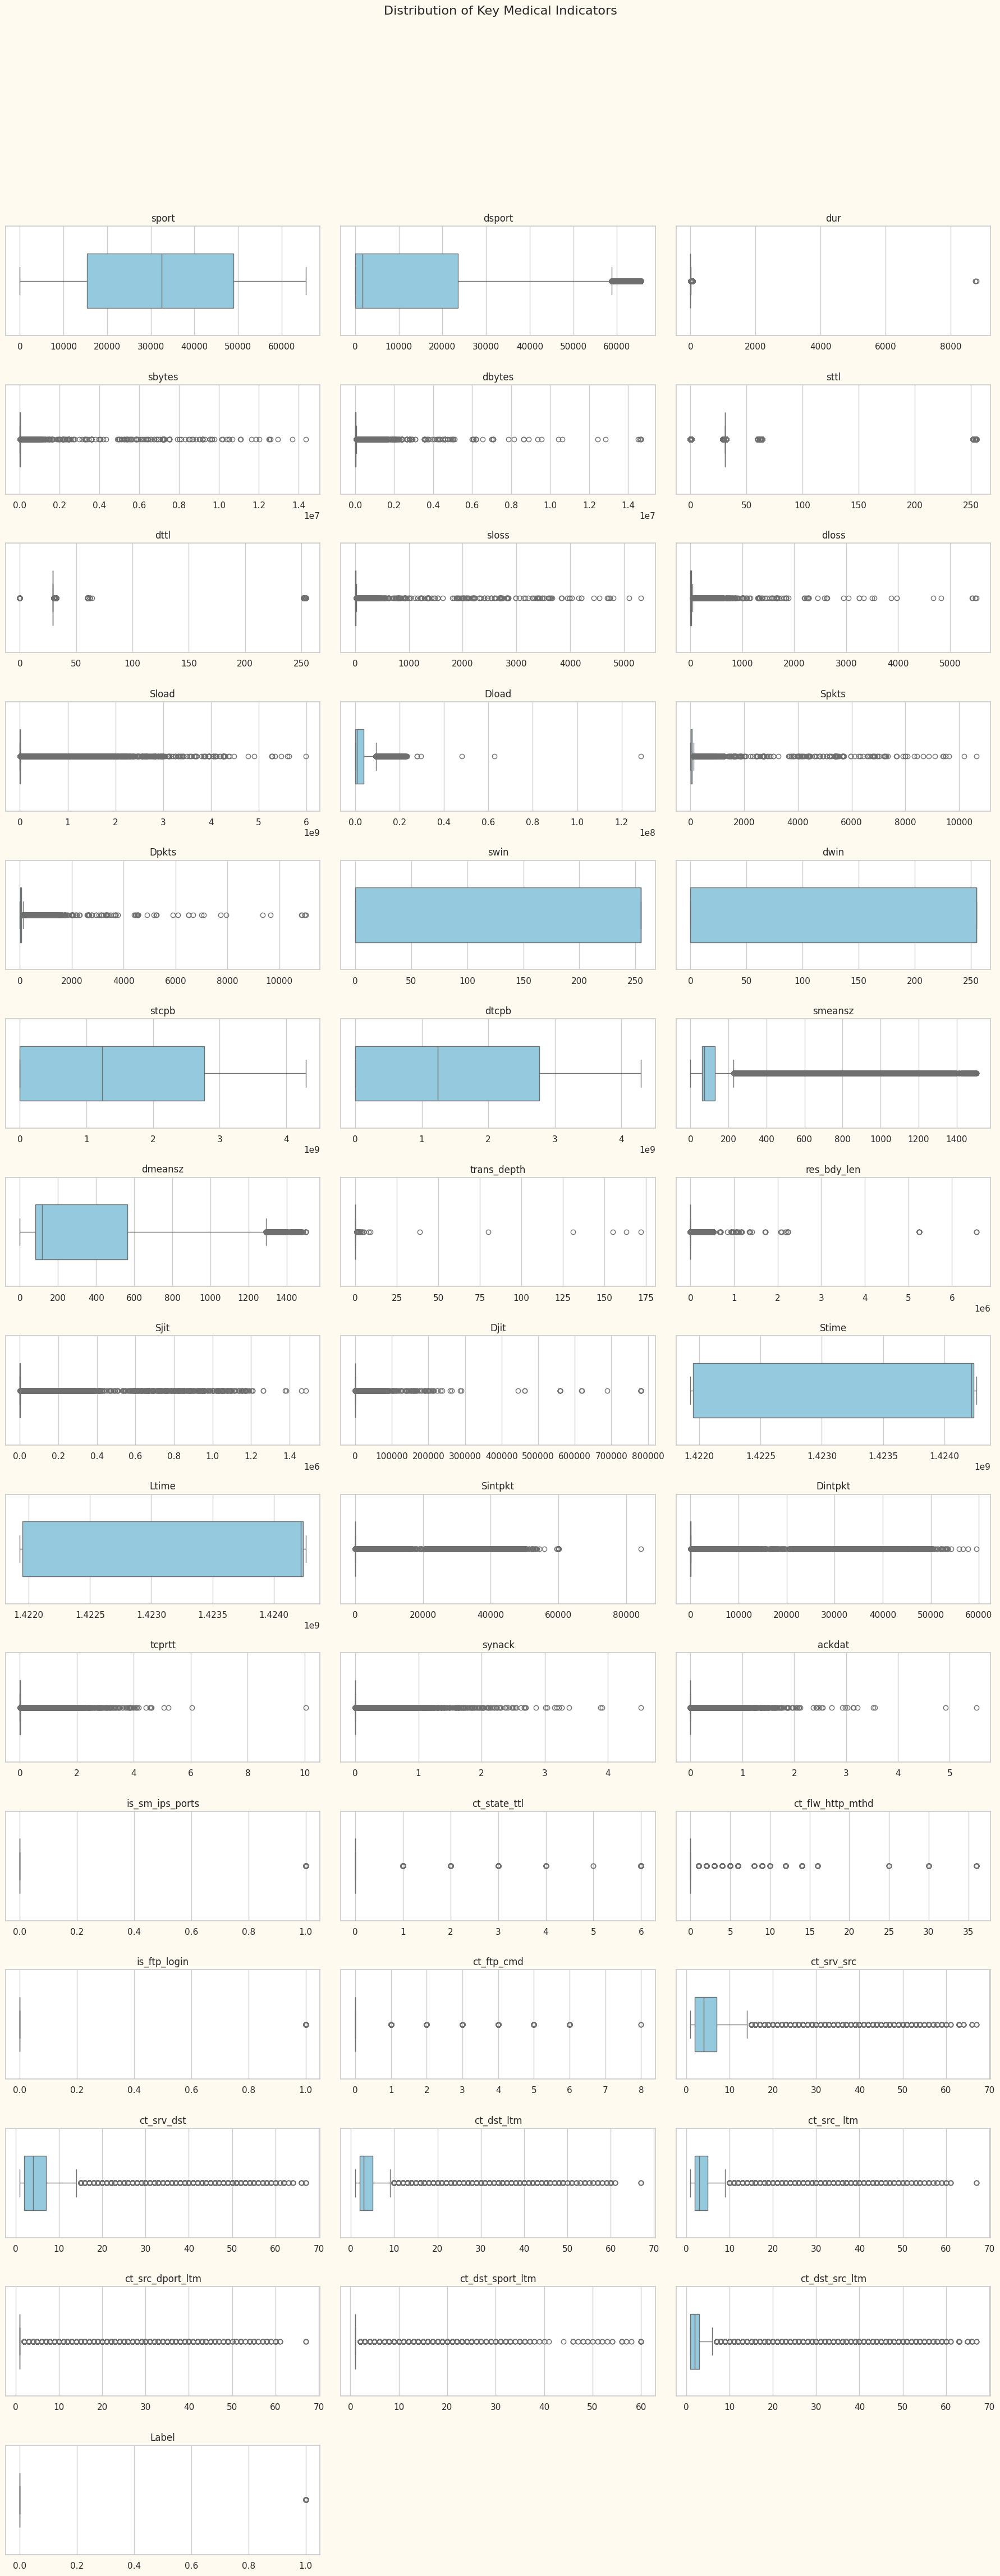

In [20]:
import math

# Number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue', width=0.5)    
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [21]:
# Extract numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Columns to exclude
exclude_columns = ['sport', 'swim', 'dwim', 'stcpb', 'dtcpb', 'Stime', 'Ltime']

# Filter out the columns to exclude
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

In [22]:
for col in numerical_columns:
    median_value = train_df[col].median()
    lower_bound = train_df[col].quantile(0.25) - 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    upper_bound = train_df[col].quantile(0.75) + 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

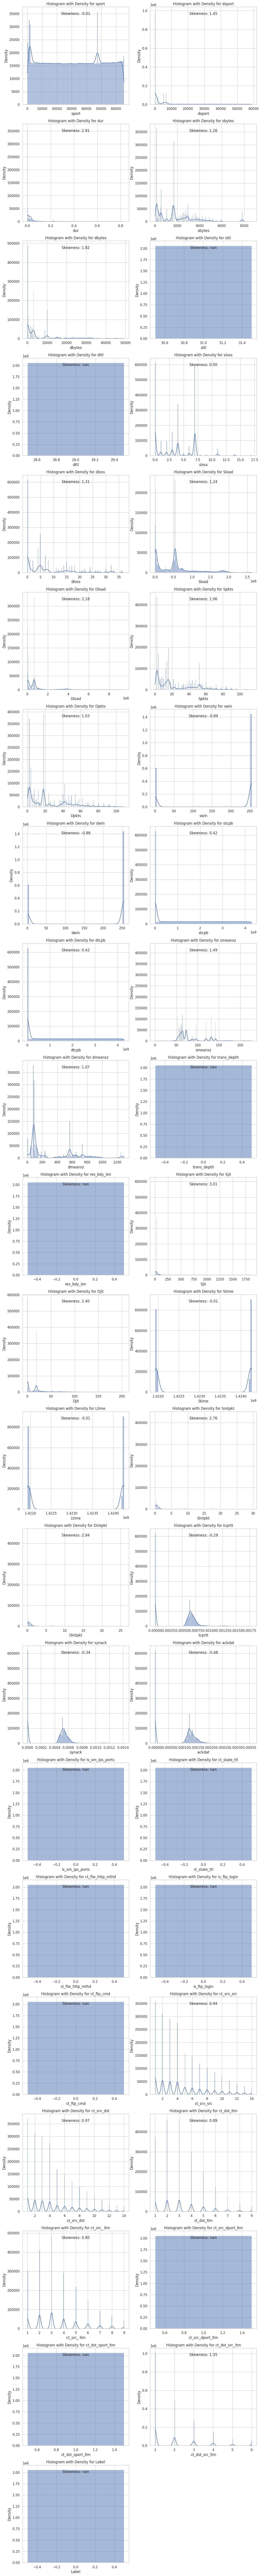

In [23]:
# Set the figure size and arrange plots horizontally in pairs
numerical_features = train_df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate skewness
    skewness = skew(train_df[col].dropna())
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

# Remove any empty subplots if the number of features is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])


In [24]:
def transform(X):
    eps = 1e-5
    numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    for col in numerical_columns:
        skewness = skew(X[col])
        if skewness > 0:  # Positive skew
            X[col] = np.log(X[col] + eps)
        elif skewness < 0:  # Negative skew
            X[col] = np.log(np.max(X[col] + eps) - X[col] + eps)
        else:  # Symmetric or zero skew
            X[col] = X[col]  # No transformation needed
            
    return X

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def pie_bar_plot(df, col):
    plt.figure(figsize=(10, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=None, autopct="", startangle=90, colors=colors)
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.show()

In [26]:
def generate_features(df):
    # Duration
    df['duration'] = df['Ltime'] - df['Stime']
    
    # Ratios
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['Spkts'] / (df['Dpkts'] + 1)
    df['load_ratio'] = df['Sload'] / (df['Dload'] + 1)
    df['jit_ratio'] = df['Sjit'] / (df['Djit'] + 1)
    df['inter_pkt_ratio'] = df['Sintpkt'] / (df['Dintpkt'] + 1)
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)
    
    # Aggregate Features
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['Spkts'] + df['Dpkts']
    df['total_load'] = df['Sload'] + df['Dload']
    df['total_jitter'] = df['Sjit'] + df['Djit']
    df['total_inter_pkt'] = df['Sintpkt'] + df['Dintpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']
    
    # Interaction Features
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['Spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['Dpkts']
    df['load_jit_interaction_src'] = df['Sload'] * df['Sjit']
    df['load_jit_interaction_dst'] = df['Dload'] * df['Djit']
    df['pkt_jit_interaction_src'] = df['Spkts'] * df['Sjit']
    df['pkt_jit_interaction_dst'] = df['Dpkts'] * df['Djit']
    
    # Statistical Features
    df['mean_pkt_size'] = df['smeansz'] + df['dmeansz']
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']
    
    return df

In [27]:
# Drop the specified columns from both train_df and test_df
columns_to_drop = ['sport', 'dsport', 'proto','srcip', 'dstip','state', 'service']
train_df.drop(columns=columns_to_drop, inplace=True)

In [28]:
#Checking the categorical columns 
cat_columns = train_df.select_dtypes(include=['O']).columns.tolist()
cat_columns

['attack_cat']

In [29]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder()

In [30]:
train_df['attack_cat'] = label_encoder.fit_transform(train_df['attack_cat'])

In [31]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'analysis': np.int64(0), 'backdoor': np.int64(1), 'backdoors': np.int64(2), 'dos': np.int64(3), 'exploits': np.int64(4), 'fuzzers': np.int64(5), 'generic': np.int64(6), 'normal': np.int64(7), 'reconnaissance': np.int64(8), 'shellcode': np.int64(9), 'worms': np.int64(10)}


In [32]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:
sbytes and dloss
sloss and Spkts
sloss and Dpkts
dloss and Spkts
dloss and Dpkts
Spkts and Dpkts
swin and dwin
swin and tcprtt
swin and synack
swin and ackdat
dwin and tcprtt
dwin and synack
dwin and ackdat
Sjit and Sintpkt
Stime and Ltime
tcprtt and synack
tcprtt and ackdat
synack and ackdat


In [33]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

# Drop the features from the DataFrame
train_df = train_df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(train_df.columns)

Remaining features after dropping highly correlated ones:
Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'Sload', 'Dload',
       'swin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
       'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Dintpkt', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object', name='Name')


In [34]:
x = train_df.drop(['attack_cat'], axis=1)
y = train_df[['attack_cat']]

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Define the desired number of samples for each class
desired_count = 15000

# Define the oversampling strategy for SMOTE
oversample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] < desired_count}

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Print class distribution before resampling
print("Before resampling:", y.value_counts())
print()

# Apply the pipeline to resample the dataset
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print class distribution after resampling
print("After resampling:", y_resampled.value_counts())

Before resampling: attack_cat
7             1959771
4               27600
6               25378
5               21795
8               13357
3                5665
0                2185
1                1684
9                1511
2                 300
10                171
Name: count, dtype: int64

After resampling: attack_cat
0             15000
1             15000
2             15000
3             15000
4             15000
5             15000
6             15000
7             15000
8             15000
9             15000
10            15000
Name: count, dtype: int64


In [36]:
x = x_resampled
y = y_resampled

In [37]:
discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df

In [38]:
mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)

mi_scores

,Features,Scores
0,sbytes,1.251379
1,smeansz,1.045078
2,dbytes,0.744388
3,Stime,0.742683
4,dmeansz,0.710779
5,ct_srv_dst,0.557366
6,ct_srv_src,0.530610
7,dur,0.528877
8,Dload,0.490884
9,ct_src_ ltm,0.433482


In [39]:
# Filter features with scores less than 0.001285
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

# Print the list of low score feature names
low_score_feature_names

['Label',
 'ct_flw_http_mthd',
 'sttl',
 'is_sm_ips_ports',
 'dttl',
 'ct_ftp_cmd',
 'res_bdy_len',
 'trans_depth',
 'is_ftp_login',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'ct_src_dport_ltm']

In [40]:
x.drop(low_score_feature_names,axis=1, inplace = True)

In [41]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

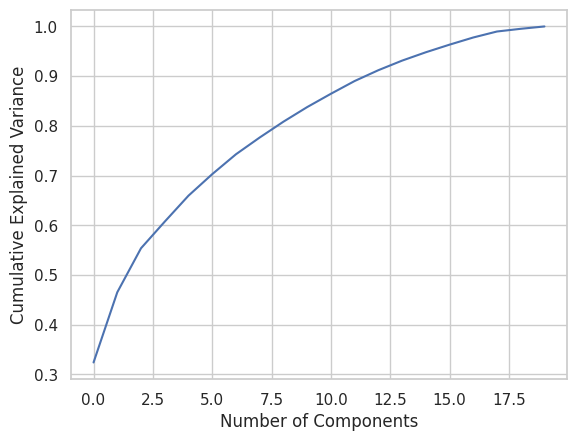

In [42]:
pca = PCA()
pca.fit(x_scaled)  # X_train is your training data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [48]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
# Convert label-encoded target variable to one-hot encoding
y_train_one_hot = to_categorical(y_train['attack_cat'], num_classes=11)
y_test_one_hot = to_categorical(y_test['attack_cat'], num_classes=11)

In [59]:
model = Sequential()

In [60]:
# Input layer
model.add(Dense(25, activation='relu', input_dim=20,
                kernel_regularizer=l2,
                kernel_initializer='glorot_uniform'))

# Hidden layer with Batch Normalization and Dropout
model.add(Dense(18, activation='relu',
                kernel_regularizer=l2))
model.add(BatchNormalization())

# Hidden layer with Batch Normalization and Dropout
model.add(Dense(12, activation='relu',
                kernel_regularizer=l2))
model.add(BatchNormalization())

# Output layer
model.add(Dense(11, activation='softmax'))

# Print the model summary
model.summary()


I0000 00:00:1771003760.290406    1442 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1763 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           468 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 18)             │            72 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           143 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,484 (5.80 KB)

 Trainable params: 1,424 (5.56 KB)

 Non-trainable params: 60 (240.00 B)

In [61]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])


In [ ]:
# early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# CALLBACKS = [early_stopping_cb]

# history = model.fit(x_train_scaled,y_train_one_hot,epochs=100,validation_data = (x_test_scaled,y_test_one_hot),callbacks = CALLBACKS)

Epoch 1/100


2026-02-13 17:29:27.733987: I external/local_xla/xla/service/service.cc:163] XLA service 0x75529800e050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-13 17:29:27.734021: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2026-02-13 17:29:27.827382: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-13 17:29:28.183577: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91900


  62/4125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1057 - loss: 3.2696 

I0000 00:00:1771003770.455376    3277 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4125/4125 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5923 - loss: 1.4313 - val_accuracy: 0.6603 - val_loss: 1.0832
Epoch 2/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6666 - loss: 1.0474 - val_accuracy: 0.6889 - val_loss: 0.9767
Epoch 3/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6786 - loss: 0.9948 - val_accuracy: 0.6896 - val_loss: 0.9807
Epoch 4/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6872 - loss: 0.9674 - val_accuracy: 0.7017 - val_loss: 0.9234
Epoch 5/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6914 - loss: 0.9558 - val_accuracy: 0.7023 - val_loss: 0.9277
Epoch 6/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6928 - loss: 0.9496 - val_accuracy: 0.6989 - val_loss: 0.9362
Epoch 7/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6958 - loss: 0.9415 - val_accuracy: 0.6975 - val_loss: 0.9327
Epoch 8/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6963 - loss: 0.938

In [63]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_one_hot)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7017 - loss: 0.9234
Test Loss: 0.9234094619750977
Test Accuracy: 0.7017272710800171


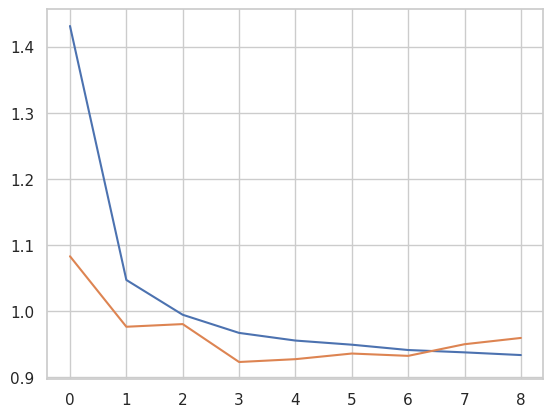

In [64]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

In [65]:
def build_model(hp):
    model = keras.Sequential()
    num_of_layer = hp.Int('num_of_layer', min_value=1, max_value=5, step=1)
    model.add(keras.layers.InputLayer(input_shape=(20,)))
    for i in range(num_of_layer):
        model.add(keras.layers.Dense(
            units=hp.Int(f'unit_{i}_layer', min_value=20, max_value=40, step=2),
            activation='relu'
        ))
        model.add(BatchNormalization())
        model.add(keras.layers.Dropout(
            rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
        ))
    model.add(keras.layers.Dense(11, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [66]:
tuner1 = keras_tuner.RandomSearch(hypermodel=build_model, objective='val_accuracy', max_trials=10, max_retries_per_trial=3,
                                directory = '/kaggle/working/',
                                 project_name='threat_detection_project')

In [67]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]

In [ ]:
# tuner1.search(x_train_scaled, y_train_one_hot , epochs = 100, validation_data = (x_test_scaled, y_test_one_hot), callbacks = callbacks)

Trial 10 Complete [00h 02m 27s]
val_accuracy: 0.5833636522293091

Best val_accuracy So Far: 0.7351818084716797
Total elapsed time: 01h 36m 36s


In [69]:
best_param = tuner1.get_best_hyperparameters(num_trials=1)[0]

In [70]:
model1 = tuner1.hypermodel.build(best_param)

In [ ]:
# history = model1.fit(x_train_scaled, y_train_one_hot ,epochs=100, validation_data=(x_test_scaled, y_test_one_hot))

Epoch 1/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4225 - loss: 1.7422 - val_accuracy: 0.5692 - val_loss: 1.2814
Epoch 2/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5444 - loss: 1.3405 - val_accuracy: 0.6119 - val_loss: 1.1317
Epoch 3/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5777 - loss: 1.2341 - val_accuracy: 0.6313 - val_loss: 1.0626
Epoch 4/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5945 - loss: 1.1762 - val_accuracy: 0.6461 - val_loss: 1.0233
Epoch 5/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6074 - loss: 1.1374 - val_accuracy: 0.6576 - val_loss: 0.9952
Epoch 6/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6170 - loss: 1.1090 - val_accuracy: 0.6632 - val_loss: 0.9719
Epoch 7/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6233 - loss: 1.0884 - val_accuracy: 0.6694 - val_loss: 0.9533
Epoch 8/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6289 -

In [ ]:
# # Save the final tuned model to an HDF5 file
# model1.save('unsw_nb15_threat_detection_model.h5')

# print("Model successfully saved as unsw_nb15_threat_detection_model.h5!")

Model successfully saved as unsw_nb15_threat_detection_model.h5!


In [ ]:
# import joblib

# # Gather the exact column names your scaler was fitted on
# # This prevents feature-ordering bugs during inference
# final_features = x.columns.tolist() 

# # The columns you are intentionally removing
# columns_to_drop = [
#     'trans_depth', 'is_sm_ips_ports', 'sttl', 'res_bdy_len', 
#     'ct_ftp_cmd', 'dttl', 'ct_state_ttl', 'ct_flw_http_mthd', 
#     'is_ftp_login', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'Label', 'attack_cat'
# ]

# # Create a dictionary containing your entire inference state
# pipeline_state = {
#     "scaler": scaler,
#     "expected_features": final_features,
#     "dropped_columns": columns_to_drop,
#     "label_encoder": label_encoder
#     # IF you used LabelEncoders for proto/state/service, add them here too!
#     # "proto_encoder": proto_encoder, 
# }


# # Save it to disk (to be loaded by your WebSocket server)
# joblib.dump(pipeline_state, "unsw_nb15_preprocessing_state.pkl")
# print("Preprocessing state saved successfully!")

Preprocessing state saved successfully!


In [43]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved model
loaded_model = load_model('unsw_nb15_threat_detection_model.h5')

I0000 00:00:1771017779.745811    1934 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1763 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [44]:
# Assuming 'x' is your original unscaled dataframe before splitting
# Let's grab the very first record from your dataset as a test example
single_record = x.iloc[0:1] # Using 0:1 keeps it as a 2D DataFrame (1 row, 32 columns)

# Scale the single record using the SAME scaler you fitted earlier
single_record_scaled = scaler.transform(single_record)

print("Shape of input:", single_record_scaled.shape) # Should be (1, 32)

Shape of input: (1, 20)


In [45]:
# Get the model's prediction probabilities
prediction_probs = loaded_model.predict(single_record_scaled)

# Find the index of the class with the highest probability
predicted_class_index = np.argmax(prediction_probs, axis=1)[0]

print(f"Predicted class index: {predicted_class_index}")
print(f"Probability array: {prediction_probs}")

2026-02-13 21:23:03.633776: I external/local_xla/xla/service/service.cc:163] XLA service 0x79dd74006b00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-13 21:23:03.633806: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2026-02-13 21:23:03.676247: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-13 21:23:03.755680: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91900


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
Predicted class index: 1
Probability array: [[3.46375495e-01 4.09400433e-01 1.50463544e-04 1.19916774e-01
  2.39779819e-02 4.06636074e-02 2.39241086e-02 2.90188647e-04
  3.30575369e-02 2.09605601e-03 1.47297935e-04]]


I0000 00:00:1771017784.020359    3873 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [46]:
# Convert the numeric prediction back to the original text label
predicted_attack_name = label_encoder.inverse_transform([predicted_class_index])
print(f"The model predicts this record is: {predicted_attack_name[0]}")

The model predicts this record is: backdoor


In [53]:
import joblib

# 1. Load the preprocessing state
pipeline_state = joblib.load("unsw_nb15_preprocessing_state.pkl")

# 2. Extract the features list
expected_features = pipeline_state["expected_features"]

print(f"Loaded {len(expected_features)} features.")
print(expected_features)

Loaded 20 features.
['dur', 'sbytes', 'dbytes', 'sloss', 'Sload', 'Dload', 'swin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'Sjit', 'Djit', 'Stime', 'Dintpkt', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_dst_src_ltm']


In [54]:
import shap
import numpy as np
import tensorflow as tf

# 1. Setup the Background Data
# SHAP needs a reference point. We'll use a small slice of your training data.
# If you don't have x_train_scaled loaded, use a zero-array of the same shape.
background = x_train_scaled[:100] 

# 2. Initialize the DeepExplainer
# DeepExplainer is specifically optimized for Keras/TensorFlow models
explainer = shap.DeepExplainer(loaded_model, background)

# 3. Calculate SHAP Values
# This returns a list of arrays (one per output class)
shap_values = explainer.shap_values(single_record_scaled)

# 4. Get the Probabilities and the Prediction
# This matches the output format you provided
probability_array = loaded_model.predict(single_record_scaled)
predicted_class = np.argmax(probability_array)

print(f"Probability array: {probability_array}")
print(f"Top Class detected: {predicted_class}")

# 5. Extract the Explanation for the Predicted Class
# We want to know why the model chose the winning class
# shap_values[predicted_class] gives us the influence of each feature for that class
if isinstance(shap_values, list):
    # Format: List of [1, features] arrays. Index by Class, then Sample.
    feature_importance = shap_values[predicted_class_index][0]
else:
    # Format: Single array of shape [samples, features, classes]
    # We take the 0th sample, all features, and the specific class index
    if len(shap_values.shape) == 3:
        feature_importance = shap_values[0, :, predicted_class_index]
    else:
        # Fallback for binary or unexpected 2D shapes [samples, features]
        feature_importance = shap_values[0]

# --- CONTINUE TO DISPLAY ---

# Get the indices of the top 3 most influential features
top_indices = np.argsort(np.abs(feature_importance))[-3:][::-1]

print(f"\n--- XAI Explanation for Class: {predicted_attack_name[0]} ---")
for i in top_indices:
    feature_name = expected_features[i]
    influence = feature_importance[i]
    direction = "INCREASED" if influence > 0 else "DECREASED"
    print(f"-> {feature_name}: This feature {direction} the probability (Value: {influence:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Probability array: [[3.46375495e-01 4.09400433e-01 1.50463544e-04 1.19916774e-01
  2.39779819e-02 4.06636074e-02 2.39241086e-02 2.90188647e-04
  3.30575369e-02 2.09605601e-03 1.47297935e-04]]
Top Class detected: 1

--- XAI Explanation for Class: backdoor ---
-> swin: This feature INCREASED the probability (Value: 0.7768)
-> sloss: This feature DECREASED the probability (Value: -0.3358)
-> sbytes: This feature INCREASED the probability (Value: 0.2423)
